In [1]:
from sklearn import datasets

mnist = datasets.fetch_mldata('MNIST original', data_home=".")
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

The label of this image is 0.


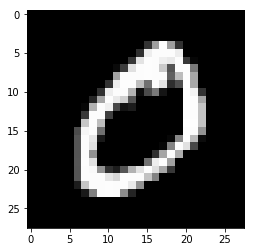

In [2]:
# 1. 데이터 전처리(이미지 데이터와 레이블 데이터 분리, 정규화)
X = mnist.data / 255
y = mnist.target

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("The label of this image is {:.0f}.".format(y[0]))

In [3]:
# 2. DataLoader로 변환
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# 2.1 데이터를 훈련 데이터와 테스트 데이터로 분할(1:6 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

# 2.2 데이터를 파이토치 텐서로 변환
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# 2.3 데이터와 정답 레이블을 하나로 묶어 Dataset으로 만듦
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# 2.4 미니배치 크기를 지정해 DataLoader 객체로 변환
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [4]:
# 3. 신경망 구성
'''Define and Run style'''
# from torch import nn

# model = nn.Sequential()
# model.add_module('fc1', nn.Linear(28*28*1, 100))
# model.add_module('relu1', nn.ReLU())
# model.add_module('fc2', nn.Linear(100, 100))
# model.add_module('relu2', nn.ReLU())
# model.add_module('fc3', nn.Linear(100, 10))

# print(model)

'''Define by Run style'''
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self, n_in, n_mid, n_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in, n_mid)
        self.fc2 = nn.Linear(n_mid, n_mid)
        self.fc3 = nn.Linear(n_mid, n_out)
        
    def forward(self, x):
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        output = self.fc3(h2)
        return output
    
model = Net(n_in=28*28*1, n_mid=100, n_out=10)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [5]:
# 4. 오차함수 및 최적화 기법 설정
from torch import optim

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
# 5. 학습 및 추론 설정
def train(epoch):
    model.train()
    
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        
    print("epoch{} : fin\n".format(epoch))

In [7]:
def test():
    model.eval()
    correct = 0
    
    with torch.no_grad():
        for data, targets in loader_test:

            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    
    data_num = len(loader_test.dataset)
    print("\npredicetd correction : {}/{} ({:.0f}%\n)".format(correct, data_num, 100. * correct / data_num))

In [8]:
test()


predicetd correction : 969/10000 (9%
)


In [9]:
for epoch in range(3):
    train(epoch)

test()

epoch0 : fin

epoch1 : fin

epoch2 : fin


predicetd correction : 9549/10000 (95%
)


prediction : 7
The answer of this image is 7.


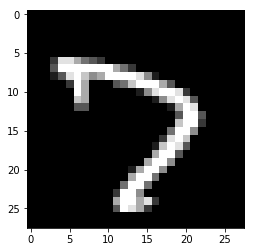

In [10]:
index = 2018 # 2018번째 데이터를 예로 추론 수행

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("prediction : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("The answer of this image is {:.0f}.".format(y_test[index]))